Average energy: -128.0000
Average magnetic moment: 8.0000


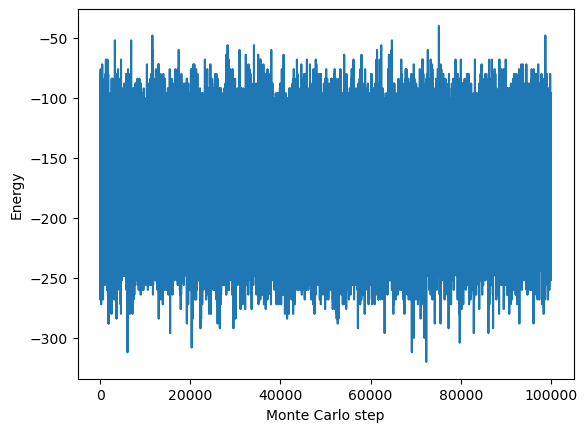

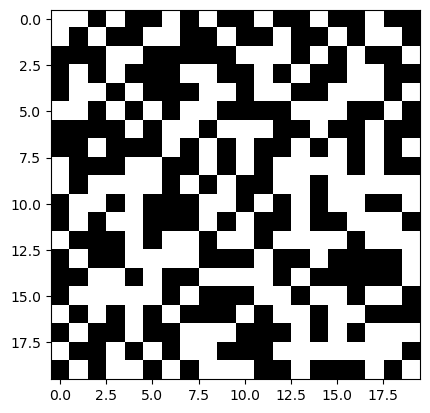

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

# Define the parameters
N = 20 # number of spins in each direction
J = -1 # coupling constant
beta = 0.2 # inverse temperature
nsteps = 100000 # number of Monte Carlo steps

# Initialize the spins randomly
spins = np.random.choice([-1, 1], size=(N, N))


# Define the energy function
def energy(spins):
    return -J * (np.sum(spins[:-1,:] * spins[1:,:]) + np.sum(spins[:,:-1] * spins[:,1:])) \
           - J * (np.sum(spins[0,:] * spins[-1,:]) + np.sum(spins[:,0] * spins[:,-1]))

@jit
# Define the Metropolis algorithm
def metropolis(spins, beta):
    for i in range(N):
        for j in range(N):
            # Choose a random spin to flip
            x, y = np.random.randint(0, N), np.random.randint(0, N)
            # Calculate the energy difference
            delta_E = 2 * J * spins[x, y] * \
                      (spins[(x+1)%N, y] + spins[(x-1)%N, y] + spins[x, (y+1)%N] + spins[x, (y-1)%N])
            # Flip the spin with probability according to the Boltzmann factor
            if np.random.uniform(0, 1) < np.exp(-beta * delta_E):
                spins[x, y] = -spins[x, y]
    return spins

# Run the Monte Carlo simulation
energies = []
for i in range(nsteps):
    spins = metropolis(spins, beta)
    energies.append(energy(spins))
    
# Calculate the average energy
E = energies[len(energies)-1]

# Print the result
print(f"Average energy: {E:.4f}")

# Calculate the average magnetic moment
mu = np.sum(spins)

# Print the result
print(f"Average magnetic moment: {mu:.4f}")

# Plot the energy as a function of Monte Carlo steps
plt.plot(energies)
plt.xlabel("Monte Carlo step")
plt.ylabel("Energy")
plt.show()

# Plot the spin configuration
plt.imshow(spins, cmap='binary')
plt.show()